In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from thor_stepm import ThorlabsStageWithStepMotors
#from instrumental import u, Q_
from instrumental import instrument,list_instruments
from instrumental.drivers.spectrometers.thorlabs_ccs import CCS
paramsets = list_instruments()
paramsets
ccs = instrument(paramsets[0])
ccs

C:\ProgramData\Anaconda3\envs\syst\lib\site-packages\cffi\cparser.py:150: UserWarning: String literal found in cdef() or type source. String literals are ignored here, but you should remove them anyway because some character sequences confuse pre-parsing.
  warnings.warn("String literal found in cdef() or type source. "


In [2]:
stage = ThorlabsStageWithStepMotors()
stage.set_stage()

Building the device list...
There are 2 devices in the device list
The serial numbers of all the devices are: ['26001683', '26001718']
The motor in the x direction is the one with serial number # 26001683
The motor in the y direction is the one with serial number # 26001718
Connected to KCubeStepperMotor<Thorlabs|KST101|26001683>
Connected to KCubeStepperMotor<Thorlabs|KST101|26001718>
Homing both motors...
Homing done.


In [3]:
stage.move_to_x_y(0.0,0.0)

In [ ]:
import numpy as np
import time
attempts = 0

for i in np.arange(0.0,1.0,0.1):
    time.sleep(1)
    while attempts < 5:
        try:
            j,i = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
            i.append(x)
            j.append(y)
        except:
            time.sleep(1)
            attempts+=1
            print('could not get the spectra!')
    stage.move_to_x_y(i,0.0)
    time.sleep(1)

5


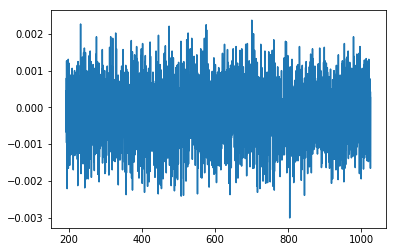

In [12]:
a=0
import time
while a < 5:
    try:
        y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
        plt.plot(x,y)
    except:
        time.sleep(2)
        a+=1
print(a)

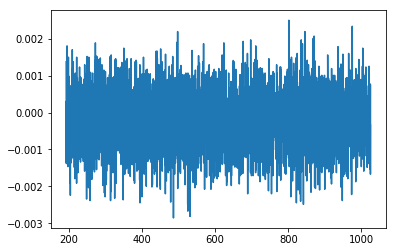

In [9]:
y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
plt.plot(x,y)

In [ ]:
ccs.close()

In [ ]:
ccs.get_device_info()